# Diferencijalne jednadžbe

---

Riješimo diferencijalnu jednadžbu

$$
\frac{d}{dx} y(x)=f(x,y(x)),
$$

uz zadani __početni uvjet__ 

$$ 
y(x_0)=y_0.
$$

## Euler-ova metoda

Počevši od točke $x_0$, za niz jednako udaljenih točaka

$$
x_{k+1}=x_{k}+h,
$$

vrijednost funkcije $y_{k+1}$ u točki $x_{k+1}$ se aproksimira s prva dva člana Taylorovog reda oko točke $x_k$:

$$
y(x_{k+1})\approx y_{k+1}=y_k+h f(x_k,y_k).
$$

__Lokalna pogreška__ je $O(h^2)$, a __globalna pogreška__ je $O(h)$ pa metoda nije previše točna.

In [1]:
function myEuler{T,T1}(f::Function,y0::T,x::T1)
    h=x[2]-x[1]
    y=Array{T}(length(x))
    y[1]=y0
    for i=2:length(x)
        y[i]=y[i-1]+h*f(x[i-1],y[i-1])
    end
    y
end

myEuler (generic function with 1 method)

### Primjer 1

Rješenje problema početnih vrijednosti 

$$
y'=x+y,\quad y(0)=1,
$$

je

$$
y=2e^x-x-1
$$

(vidi [Numerička matematika, primjer 8.1][RS04]).

[RS04]: http://www.mathos.unios.hr/pim/Materijali/Num.pdf "R. Scitovski, 'Numerička matematika', Sveučilište u Osijeku, Osijek, 2004."

In [2]:
# 10 podintervala na intervalu [0,1]
x=linspace(0,1,11)
f1(x,y)=x+y
y=myEuler(f1,1.0,x)

11-element Array{Float64,1}:
 1.0    
 1.1    
 1.22   
 1.362  
 1.5282 
 1.72102
 1.94312
 2.19743
 2.48718
 2.8159 
 3.18748

In [3]:
using Gadfly

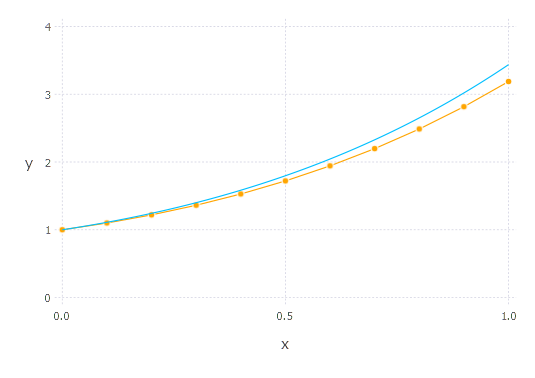

In [4]:
# Gadfly crta funkcije i točke
solution1(x)=2*exp(x)-x-1
plot(layer(solution1,0,1),
layer(x=x,y=y,Geom.point, Geom.line, Theme(default_color=colorant"orange")))

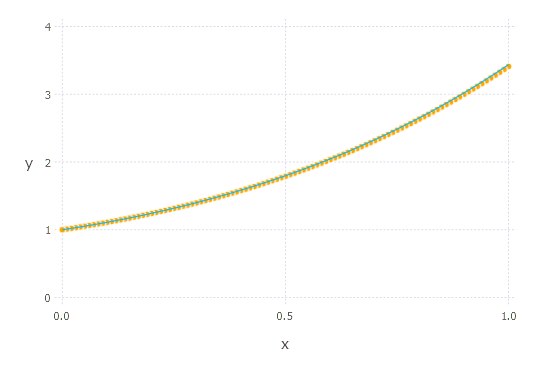

In [5]:
# 100 podintervala na intervalu [0,1]
x=linspace(0,1,101)
y=myEuler(f1,1.0,x)
plot(layer(solution1,0,1),
layer(x=x,y=y,Geom.point, Geom.line, Theme(default_color=colorant"orange")))

### Primjer 2

Rješenje problema

$$
y'=30(\sin x-y), \quad y(0)=0,
$$

je

$$
y(x)=\frac{30}{901}(30\sin x-\cos x+e^{-30x})
$$

(vidi [Numerička matematika, primjer 8.3][RS04]).

[RS04]: http://www.mathos.unios.hr/pim/Materijali/Num.pdf "R. Scitovski, 'Numerička matematika', Sveučilište u Osijeku, Osijek, 2004."

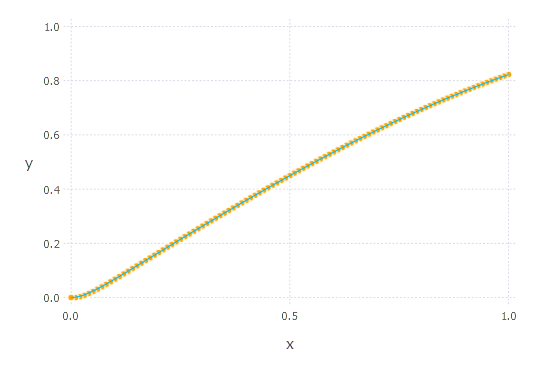

In [6]:
# 100 podintervala na intervalu [0,1]
f2(x,y)=30(sin(x)-y)
x=linspace(0,1,101)
y=myEuler(f2,0.0,x)
solution2(x)=30(30*sin(x)-cos(x)+exp(-30x))/901
plot(layer(solution2,0,1),
layer(x=x,y=y,Geom.point, Geom.line, Theme(default_color=colorant"orange")))

## Metode Runge-Kutta

Vrijednost funkcije $y(x)$ u točki $x_{k+1}$ se aproksimira pomoću vrijednosti funkcije $f(x,y)$ u nekoliko odabranih točaka na intervalu 

$$[x_k,x_{k+1}]\equiv[x_k,x_k+h].$$

__Heune-ova metoda__:

\begin{align*}
k_1&=hf(x_k,y_k),\\
k_2&=hf(x_k+h,y_k+k_1),\\
y_{k+1}&=y_k+\frac{1}{2}(k_1+k_2).
\end{align*}

__ Klasična Runge_Kutta metoda__:

\begin{align*}
k_1&=hf(x_k,y_k),\\
k_2&=hf\big(x_k+\frac{h}{2},y_k+\frac{k_1}{2}\big),\\
k_3&=hf\big(x_k+\frac{h}{2},y_k+\frac{k_2}{2}\big),\\
k_4&=hf(x_k+h,y_k+k_3),\\
y_{k+1}&=y_k+\frac{1}{6}(k_1+2k_2+2k_3+k_4).
\end{align*}

_Heune-ova metoda_ je metoda reda 2 (potrebne su dvije evaluacije funkcije $f(x,y)$ u svakom koraku), a _klasična Runge-Kutta_ metoda je metoda reda 4 (potrebne su četiri evaluacije funkcije $f(x,y)$ u svakom koraku).

__Lokalna pogreška__ klasične Runge-Kutta metode je $O(h^5)$.

In [7]:
function myRK4{T,T1}(f::Function,y0::T,x::T1)
    h=x[2]-x[1]
    y=Array{T}(length(x))
    y[1]=y0
    for i=2:length(x)
        ξ=x[i-1]
        η=y[i-1]
        k1=h*f(ξ,η)
        k2=h*f(ξ+h/2,η+k1/2)
        k3=h*f(ξ+h/2,η+k2/2)
        k4=h*f(ξ+h,η+k3)
        y[i]=η+(k1+2*k2+2*k3+k4)/6.0
    end
    y
end

myRK4 (generic function with 1 method)

### Primjer 3

Riješimo probleme iz Primjera 1 i 2. Za Primjer 1 se numeričko rješenje grafički preklapa s točnim rješenjem. 
Za Primjer 2 je rješenje pomoću `myRK4()` ze red veličine točnije od rješenja dobivenog pomoću `myEuler()`. 

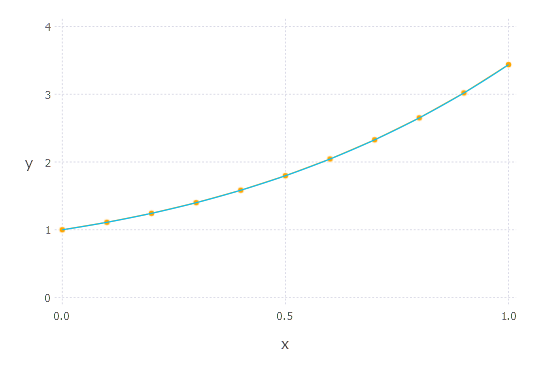

In [8]:
x=linspace(0,1,11)
y=myRK4(f1,1.0,x)
plot(layer(solution1,0,1),
layer(x=x,y=y,Geom.point, Geom.line, Theme(default_color=colorant"orange")))

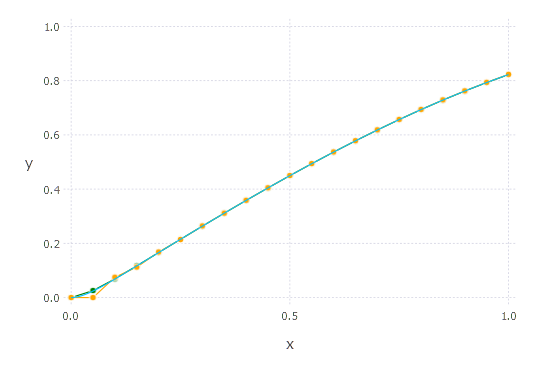

In [9]:
x=linspace(0,1,21)
yEuler=myEuler(f2,0.0,x)
yRK4=myRK4(f2,0.0,x)
plot(layer(solution2,0,1),
layer(x=x,y=yEuler,Geom.point, Geom.line, Theme(default_color=colorant"orange")),
layer(x=x,y=yRK4,Geom.point, Geom.line, Theme(default_color=colorant"green")))

In [10]:
solution2(1), yEuler[end],yRK4[end]

(0.8225469668713269, 0.8232246149737463, 0.8224510545539467)

### Postojeće rutine

Većina programa ima ugrađene odgovarajuće rutine za numeričko rješavanje običnioh diferencijalnih jednadžbi.
Tako, na primjer, 

* Ṁatlab ima rutine `ode*` (vidi [Matlab, Ordinary Defferential Equations](http://www.mathworks.com/help/matlab/math/ordinary-differential-equations.html)), a 
* Julia ima paket  `ODE.jl`.

Klasična RK4 metoda je implementirana u funkciji `ode4()`, a Heuneova metoda je implementirana u funkciji 
`ODE.ode2_heun()`. 

__Napomena__ Funkcija `ODE.ode2_heun()` nije vidljiva pozivom naredbe `whos()` jer nije izvezena, ali se može vidjeti u datoteci `runge_kutta.jl`.

In [11]:
using ODE

In [13]:
# whos(ODE)

In [14]:
methods(ode4)

# 3 methods for generic function "(::Type)":
ODE.ode4() in ODE at C:\Users\Ivan\.julia\v0.6\ODE\src\algorithm_types.jl:8
ODE.ode4(fn, y0, tspan; kwargs...) in ODE at C:\Users\Ivan\.julia\v0.6\ODE\src\runge_kutta.jl:168
(::Type{T})(arg) where T in Base at sysimg.jl:24

In [15]:
methods(ODE.ode2_heun)

# 1 method for generic function "ode2_heun":
ode2_heun(fn, y0, tspan) in ODE at C:\Users\Ivan\.julia\v0.6\ODE\src\runge_kutta.jl:167

In [16]:
# Riješimo problem iz Primjera 2. Vrijednosti od y su drugi element izlaza.
yode4=ode4(f2,0.0,linspace(0,1,21))[2]

21-element Array{Float64,1}:
 0.0      
 0.0257747
 0.0690793
 0.117022 
 0.165988 
 0.214899 
 0.263371 
 0.311211 
 0.358282 
 0.404458 
 0.449624 
 0.493667 
 0.536475 
 0.577943 
 0.617966 
 0.656445 
 0.693283 
 0.728388 
 0.761672 
 0.793053 
 0.822451 

In [17]:
yode2=ODE.ode2_heun(f2,0.0,linspace(0,1,21))[2]

21-element Array{Float64,1}:
 0.0      
 0.0374844
 0.0795606
 0.124366 
 0.170692 
 0.217734 
 0.264948 
 0.311946 
 0.358443 
 0.404219 
 0.449094 
 0.492915 
 0.535546 
 0.576865 
 0.616759 
 0.655122 
 0.691854 
 0.72686  
 0.760053 
 0.791347 
 0.820664 

In [18]:
# Usporedimo
[yRK4 yode4 yRK4-yode4 yode2 yode4-yode2]

21×5 Array{Float64,2}:
 0.0        0.0         0.0          0.0         0.0        
 0.0257747  0.0257747   0.0          0.0374844  -0.0117097  
 0.0690793  0.0690793   0.0          0.0795606  -0.0104813  
 0.117022   0.117022    1.38778e-17  0.124366   -0.00734424 
 0.165988   0.165988    0.0          0.170692   -0.00470359 
 0.214899   0.214899    0.0          0.217734   -0.0028354  
 0.263371   0.263371    0.0          0.264948   -0.00157673 
 0.311211   0.311211    5.55112e-17  0.311946   -0.000734077
 0.358282   0.358282   -5.55112e-17  0.358443   -0.000161512
 0.404458   0.404458    0.0          0.404219    0.000238917
 0.449624   0.449624    0.0          0.449094    0.000530205
 0.493667   0.493667    0.0          0.492915    0.000752135
 0.536475   0.536475    1.11022e-16  0.535546    0.00092961 
 0.577943   0.577943    0.0          0.576865    0.00107814 
 0.617966   0.617966    0.0          0.616759    0.00120733 
 0.656445   0.656445    0.0          0.655122    0.0013231  
 

## Sustavi diferencijalnih jednadžbi

__Problem:__ Riješimo sustav od $n$ jednadžbi 

\begin{align*}
y_1'(x)&=f_1(x,y_1,y_2,\ldots,y_n),\\
y_2'(x)&=f_2(x,y_1,y_2,\ldots,y_n),\\
&\vdots \\
y_n'(x)&=f_2(x,y_1,y_2,\ldots,y_n)
\end{align*}

i $n$ nepoznanica $y_1,y_2,\ldots,y_n$ uz početne uvjete

$$
y_i(x_0)=\zeta_i.
$$

Uz oznake 

\begin{align*}
f&=(f_1,f_2,\ldots,f_n)^T,\\
y&=(y_1,y_2,\ldots,y_n)^T,\\
\zeta&=(\zeta_1,\zeta_2,\ldots,\zeta_n)^T,
\end{align*}

zadani problem možemo zapisati kao 

$$
y'(x)=f(x,y),\quad y(x_0)=\zeta.
$$

Problem se uspješno rješava Eulero-vom metodom i metodama Runge-Kutta u vektorskom obliku.

### Primjer 4 - Lhotka-Volterra-ine jednadžbe

Modeliranje sustava __lovac-plijen__ daje sustav __Lhotka-Volterra-inih__ jednadžbi
(vidi [Matematika 2, poglavlje 5.11][IS08] i [Numerička matematika, primjer 8.7][RS04]):

\begin{align*}
\frac{dZ}{dt}&=z\,Z-a\, Z\, V = Z\,(z-a\, V), \tag{1}\\
\frac{dV}{dt}&=-v\,V+b\, Z\, V = V\,(-v+b\, Z), \quad v,z,a,b>0,
\end{align*}

uz početne uvjete 

$$
V(t_0)=V_0,\qquad Z(t_0)=Z_0.
$$

__Stabilna stanja__ su ona u kojima nema promjene, odnosno, ona u kojima su obje derivacije jednake nuli. To su _trivijalno_ stabilno stanje, $V=Z=0$ i

$$
V=\frac{z}{a},\qquad Z=\frac{b}{v}. \tag{2}
$$


U __faznom prostoru__, eliminacijom nezavisne varijable $t$, dobijemo jednu linearnu diferencijalnu jednadžbu, na primjer:

$$
\frac{dV}{dZ}=\frac{\displaystyle\frac{dV}{dt}}{\displaystyle\frac{dZ}{dt}}=
\frac{V\,(-v+b\, Z)}{Z\,(z-a\, V)}, \tag{3}
$$

koja ima egzaktno rješenje (implicitno zadano):

$$
V^z \, Z^v = C\,  e^{aV}\, e^{bZ}\qquad 
C=\frac{V_0^{z}\, Z_0^{v}}{\displaystyle e^{a V_0}e^{b Z_0}}
\tag{4}
$$

Riješimo sustav za populacije vukova $V$ i zečeva $Z$ uz

$$
v=0.02, \quad z=0.06,\quad a=0.001,\quad b=0.00002,\quad V(0)=30, \quad Z(0)=800,
$$

te riješenje faznom prostoru usporedimo s egzaktnim rješenjem.

__Napomena__: Funkcije `myEuler()`, `myRK4()` i funkcije iz paketa `ODE.jl` su već prilagođene i za rješavanje sustava.

[IS08]: http://lavica.fesb.hr/mat2/predavanja/node46.html "I. Slapničar, 'Matematika 2', FESB, Split, 2008."

[RS04]: http://www.mathos.unios.hr/pim/Materijali/Num.pdf "R. Scitovski, 'Numerička matematika', Sveučilište u Osijeku, Osijek, 2004."

In [19]:
# y=[V,Z], t0=0, y0=y(0)=[30,800]
t=linspace(0,365,3651) # 356 dana s razmakom od 1/10 dana
v=0.02
z=0.06
a=0.001
b=0.00002
V0=30.0 # pocetna populacija vukova
Z0=800.0 # pocetna populacija zeceva
y0=[V0,Z0]
y=Array{Float64}
fVZ(t,y)=[y[1]*(-v+b*y[2]),y[2]*(z-a*y[1])]
y=myEuler(fVZ,y0,t)

3651-element Array{Array{Float64,1},1}:
 [30.0, 800.0]     
 [29.988, 802.4]   
 [29.9761, 804.808]
 [29.9644, 807.225]
 [29.9529, 809.649]
 [29.9415, 812.082]
 [29.9302, 814.523]
 [29.9191, 816.972]
 [29.9082, 819.43] 
 [29.8974, 821.895]
 [29.8867, 824.37] 
 [29.8762, 826.852]
 [29.8659, 829.343]
 ⋮                 
 [36.3502, 405.478]
 [36.307, 406.436] 
 [36.2639, 407.399]
 [36.2209, 408.366]
 [36.178, 409.338] 
 [36.1353, 410.313]
 [36.0927, 411.292]
 [36.0502, 412.275]
 [36.0078, 413.263]
 [35.9655, 414.254]
 [35.9234, 415.25] 
 [35.8814, 416.249]

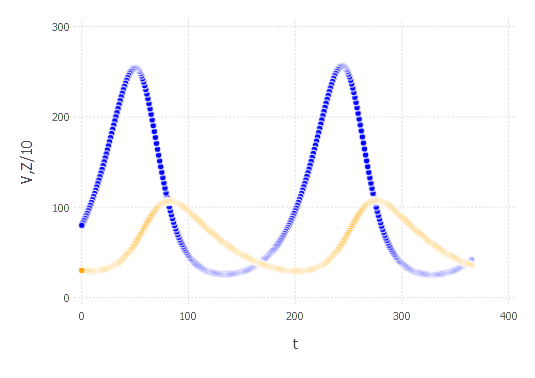

In [20]:
# Skaliramo Z u Z/10 da graf bude citkiji
V=map(Float64,[y[i][1] for i=1:length(y)])
Z=map(Float64,[y[i][2] for i=1:length(y)])
Gadfly.plot(layer(x=t[1:10:end],y=V[1:10:end],Geom.point,
        Theme(default_color=colorant"orange")),
    layer(x=t[1:10:end],y=Z[1:10:end]/10,
        Geom.point,Theme(default_color=colorant"blue")),
Guide.xlabel("t"),Guide.ylabel("V,Z/10"))

In [21]:
# usporedimo rješenja s metodom myRK4() i ode4() 
yRK4=myRK4(fVZ,y0,t)
yode4=ode4(fVZ,y0,t)[2]
[y yRK4 yode4]

3651×3 Array{Array{Float64,1},2}:
 [30.0, 800.0]       [30.0, 800.0]       [30.0, 800.0]     
 [29.988, 802.4]     [29.9881, 802.404]  [29.9881, 802.404]
 [29.9761, 804.808]  [29.9763, 804.816]  [29.9763, 804.816]
 [29.9644, 807.225]  [29.9647, 807.237]  [29.9647, 807.237]
 [29.9529, 809.649]  [29.9532, 809.665]  [29.9532, 809.665]
 [29.9415, 812.082]  [29.9419, 812.102]  [29.9419, 812.102]
 [29.9302, 814.523]  [29.9307, 814.548]  [29.9307, 814.548]
 [29.9191, 816.972]  [29.9197, 817.001]  [29.9197, 817.001]
 [29.9082, 819.43]   [29.9088, 819.463]  [29.9088, 819.463]
 [29.8974, 821.895]  [29.8981, 821.933]  [29.8981, 821.933]
 [29.8867, 824.37]   [29.8875, 824.411]  [29.8875, 824.411]
 [29.8762, 826.852]  [29.8771, 826.898]  [29.8771, 826.898]
 [29.8659, 829.343]  [29.8668, 829.393]  [29.8668, 829.393]
 ⋮                                                         
 [36.3502, 405.478]  [36.5054, 420.609]  [36.5054, 420.609]
 [36.307, 406.436]   [36.4631, 421.599]  [36.4631, 421.599]
 [36.2

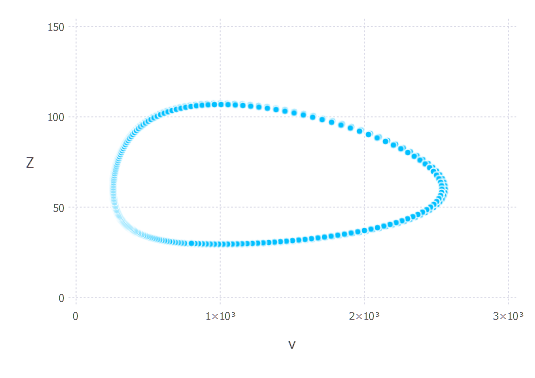

In [22]:
# Nacrtajmo rjesenje u faznom prostoru
Gadfly.plot(x=Z[1:10:end],y=V[1:10:end],Guide.xlabel("v"),Guide.ylabel("Z"))

### Skalirane Lhotka-Volterra-ine jednadžbe

Crtanje egzaktnog rješenja (3) u faznom prostoru nije moguće direktno, 
jer crtanje implicitno zadanih funkcija na velikom području traje izuzetno dugo. Međutim, 
pomoću transformacija (vidi [Modeling Complex Systems, poglavlje 2.1][NB10])

$$
X=\frac{b}{v}Z,\quad Y=\frac{a}{z}V,\quad \tau=\sqrt{z\cdot v}\, t,\quad \rho=\sqrt{\displaystyle\frac{z}{v}},
$$

jednadžbu (1) je moguće prikazati u __bezdimenzionalnim varijablama__ 
u __skaliranom vremenu__ $\tau$:

\begin{align*}
\frac{dX}{d\tau}&=\rho\, X\,(1-Y),\tag{5} \\
\frac{dY}{d\tau}&=-\frac{1}{\rho}\, Y\,(1-X). 
\end{align*}

Sustav (5) ovisi o samo __jednom__ parametru $\rho$ i ima netrivijalno stabilno rješenje $X=Y=1$, a rješenje (4) u faznom prostoru je

$$
Y \, X^{1/\rho^2} = C\,  e^{Y}\, e^{X/\rho^2},\qquad 
C=\frac{Y_0\, X_0^{1/\rho^2}}{\displaystyle e^{Y_0}e^{X_0/\rho^2}}.
$$


Riješimo sustav iz Primjera 4 u bezdimenzionalnom obliku i grafički usporedimo rješenja:

[NB10]: http://www.springer.com/us/book/9781441965615 "Nino Boccara, 'Modeling Complex Systems', 2nd Edition, Springer, 2010." 

In [23]:
ρ=sqrt(z/v)
τ=linspace(0,365*sqrt(z*v),3651)
y0=[Z0*b/v,V0*a/z]
fXY(τ,y)=[ρ*y[1]*(1-y[2]),-y[2]*(1-y[1])/ρ]
y=myEuler(fXY,y0,τ)

3651-element Array{Array{Float64,1},1}:
 [0.8, 0.5]          
 [0.8024, 0.4998]    
 [0.804808, 0.499602]
 [0.807225, 0.499407]
 [0.809649, 0.499215]
 [0.812082, 0.499025]
 [0.814523, 0.498837]
 [0.816972, 0.498652]
 [0.81943, 0.49847]  
 [0.821895, 0.49829] 
 [0.82437, 0.498112] 
 [0.826852, 0.497937]
 [0.829343, 0.497765]
 ⋮                   
 [0.405478, 0.605836]
 [0.406436, 0.605116]
 [0.407399, 0.604398]
 [0.408366, 0.603681]
 [0.409338, 0.602967]
 [0.410313, 0.602255]
 [0.411292, 0.601544]
 [0.412275, 0.600836]
 [0.413263, 0.60013] 
 [0.414254, 0.599426]
 [0.41525, 0.598723] 
 [0.416249, 0.598023]

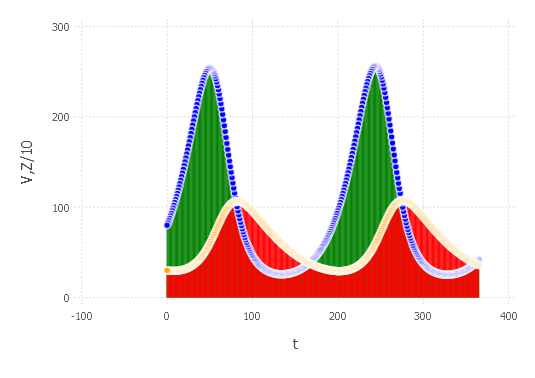

In [24]:
X=map(Float64,[y[i][1] for i=1:length(y)])
Y=map(Float64,[y[i][2] for i=1:length(y)])
# Rjesenja se poklapaju!
Gadfly.plot(layer(x=t[1:10:end],y=V[1:10:end],Geom.point,
        Theme(default_color=colorant"orange")),
layer(x=t[1:10:end],y=Z[1:10:end]/10,Geom.point,
        Theme(default_color=colorant"blue")),
layer(x=τ[1:10:end]/sqrt(z*v),y=Y[1:10:end]*z/a,Geom.bar,
        Theme(default_color=colorant"red")),
layer(x=τ[1:10:end]/sqrt(z*v),y=X[1:10:end]*v/(10b),Geom.bar,
        Theme(default_color=colorant"green")),
Guide.xlabel("t"),Guide.ylabel("V,Z/10"))

In [27]:
using SymPy, PyPlot

In [28]:
?SymPy.plot_implicit

Plot an implicit equation

```
@syms x y
plot_implicit(Eq(x^2+ y^2,3), (x, -2, 2), (y, -2, 2))
```


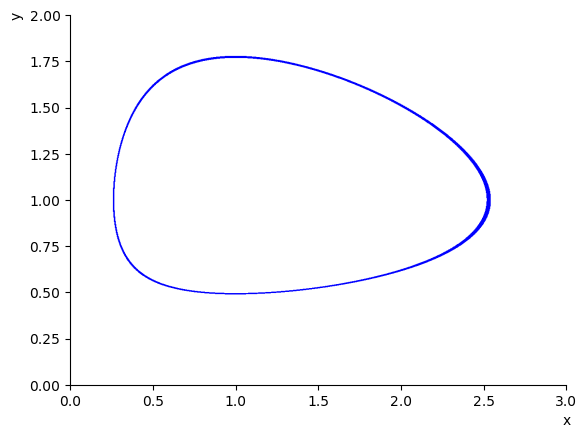

PyObject <sympy.plotting.plot.Plot object at 0x00000000793AD9E8>

In [29]:
#Crtanje implicitne funkcije traje dugo. Vidimo da se grafovi preklapaju.
@syms x y
σ=1/ρ^2
C0=(y0[2]*y0[1]^σ)/exp(y0[2]+σ*y0[1])
SymPy.plot_implicit(Eq(y*x^σ,C0*exp(y+σ*x)),(x,0,3),(y,0,2))

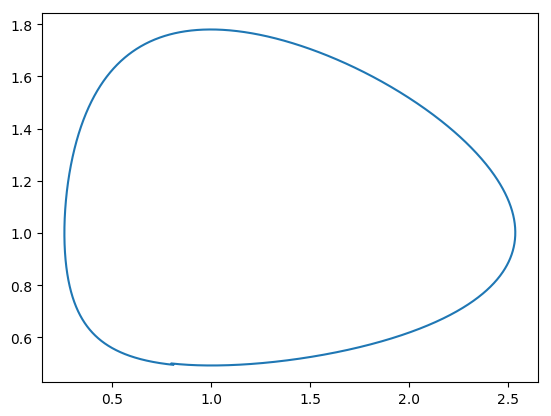

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000077A26FD0>

In [30]:
PyPlot.plot(X[1:Int((length(X)-1)/2)+120],Y[1:Int((length(X)-1)/2)+120])

## Diferencijalne jednadžbe višeg reda

Diferencijalne jednadžbe višeg reda se mogu supstitucijama svesti na sustav diferencijalnih jednadžbi prvog reda.

### Primjer 5

Rješenje problema početnih vrijednosti (vidi [Matematika 2, primjer 5.28][IS08])

$$
y'''+y''=x,\qquad y(0)=0,\quad y'(0)=0,\quad y''(0)=0
$$

je

$$
y(x)=-1+x+e^{-x}+\frac{x^3}{6}-\frac{x^2}{2}.
$$

Supstitucije

$$
y'=u,\quad y''=v,
$$

daju sustav 

\begin{align*}
y'&=u \\
u'&=v \\
v'&=-v+x\\
\end{align*}

uz početne uvjete

$$
y(0)=0,\quad u(0)=0,\quad v(0)=0.
$$

[IS08]: http://lavica.fesb.hr/mat2/predavanja/node46.html "I. Slapničar, 'Matematika 2', FESB, Split, 2008."

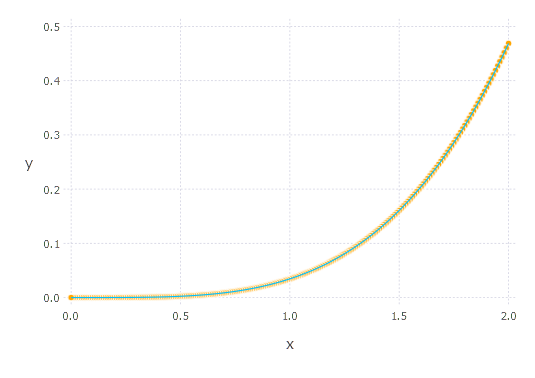

In [32]:
x=linspace(0,2,201)
y0=[0.0,0,0]
y=Array{Float64} # [y,u,v]
f5(x,y)=[y[2],y[3],-y[3]+x]
# Izračunato rješenje je prvi element polja y
yEuler=myEuler(f5,y0,x)
yRK4=myRK4(f5,y0,x)
Y=map(Float64,[yRK4[i][1] for i=1:length(yEuler)])
# Egzaktno rješenje
solution5(x)=-1+x+exp(-x)+x^3/6-x^2/2
# Nacrtajmo
Gadfly.plot(layer(solution5,0,2),
layer(x=x,y=Y,Geom.point,Theme(default_color=colorant"orange")),
Guide.xlabel("x"),Guide.ylabel("y"))

In [33]:
# Suma kvadrata pogreške
S=map(solution5,x)
vecnorm(S-Y)

3.670907947195479e-10